In [3]:
# import libraries 

from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from detecto.utils import read_image
from detecto.core import Dataset
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import torch
import torch_directml
dml = torch_directml.device()

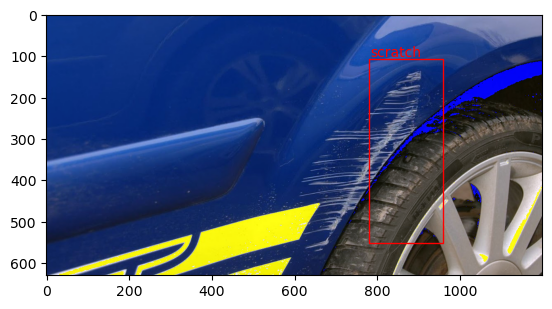

In [6]:
dataset = Dataset('Data/images/all')

image, targets = dataset[1]
show_labeled_image(image,targets['boxes'],targets['labels'])

In [7]:
from detecto.core import DataLoader, Model

labels = ['scratch']

model = Model(labels)

c:\Users\ninja\anaconda3\envs\pydml\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ninja\anaconda3\envs\pydml\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
losses = model.fit(dataset=dataset,epochs=1)

It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 1
Begin iterating over training dataset


100%|██████████| 47/47 [03:35<00:00,  4.58s/it]


In [10]:
image_path = "Data/images/test/5edfe234-image_22.jpeg"
image = read_image(image_path)

labels, boxes, scores = model.predict(image)

print('labels',labels)
print('boxes',boxes)
print('scores',scores)

labels ['scratch', 'scratch', 'scratch', 'scratch', 'scratch', 'scratch']
boxes tensor([[ 47.9429,   1.1867,  82.7961,  66.5114],
        [101.8810, 106.0300, 164.9419, 122.0353],
        [ 96.7017,  96.0672, 167.8786, 110.9415],
        [152.5226, 158.7278, 218.3309, 174.2319],
        [ 96.8929,  91.2810, 193.9729, 103.3948],
        [ 34.7489, 148.6079, 110.0761, 161.5597]])
scores tensor([0.0854, 0.0819, 0.0797, 0.0578, 0.0544, 0.0504])


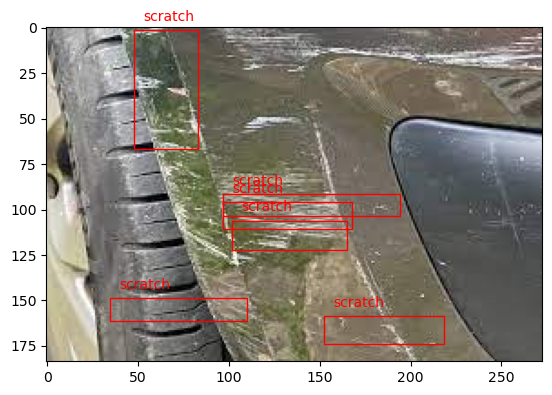

In [11]:
show_labeled_image(image,boxes,labels)